In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Source Data/sales_data.csv')
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


**Understand the Data (Exploratory Data Analysis - EDA)**

In [ ]:
# Show data types and non-null counts
df.info()

# Check for missing values in each column
print("\nMissing values:\n")
print(df.isnull().sum())

# Basic summary statistics for numeric columns
print("\nSummary statistics:\n")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB

Missing value

# Data Cleaning

In [ ]:
# 1. Drop rows with any missing values (only if there are few)
df = df.dropna()

# 2. Remove duplicate rows (if any)
df = df.drop_duplicates()

# 3. Optional: Drop irrelevant columns if you find any (like IDs, Comments)
# You can edit this list based on your actual column names
columns_to_drop = ['ID', 'COMMENTS']  # <- Replace or remove this if not present
df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')

# Preview cleaned data
df.head()


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


**Convert categorical columns to numerical (ML needs numbers)

Handle date columns (if any)

Prepare your features and target**

** Check unique values in object (categorical) columns**

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:\n", categorical_cols)

# Show unique values in each categorical column
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

Categorical Columns:
 Index(['Sale_Date', 'Sales_Rep', 'Region', 'Product_Category', 'Customer_Type',
       'Payment_Method', 'Sales_Channel', 'Region_and_Sales_Rep'],
      dtype='object')

Unique values in 'Sale_Date':
['2023-02-03' '2023-04-21' '2023-09-21' '2023-08-24' '2023-03-24'
 '2023-02-11' '2023-04-11' '2023-01-06' '2023-06-29' '2023-10-09'
 '2023-11-16' '2023-08-14' '2023-11-11' '2023-12-31' '2023-08-17'
 '2023-10-16' '2023-05-30' '2023-10-04' '2023-07-17' '2023-03-11'
 '2023-04-22' '2023-01-04' '2023-12-16' '2023-11-27' '2023-11-14'
 '2023-04-05' '2023-06-01' '2023-11-07' '2023-05-17' '2023-09-04'
 '2023-08-31' '2023-01-31' '2023-02-09' '2023-02-05' '2023-08-11'
 '2023-11-18' '2023-08-08' '2023-03-16' '2023-12-01' '2023-05-14'
 '2023-04-28' '2023-04-04' '2023-03-03' '2023-07-13' '2023-07-22'
 '2023-01-26' '2023-06-22' '2023-10-27' '2023-05-13' '2023-11-22'
 '2023-11-20' '2023-10-02' '2023-07-31' '2023-08-13' '2023-01-20'
 '2023-04-23' '2023-05-20' '2023-02-16' '2023-01-01'

# Encode Categorical Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Feature Selection + Define X and y
**In Machine Learning:

X = Features (independent variables)

y = Target (what you want to predict)

Lets check and Manually pick the target column**

**Define X and y**

In [ ]:
print(df.columns)


Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')


In [ ]:
# Set the correct target column
target_column = 'Sales_Amount'

# Define the target (y) and features (X)
y = df[target_column]
X = df.drop(columns=[target_column])

# Confirm dimensions
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1000, 13)
y shape: (1000,)


# Train-Test Split
Training set: 80% of data (used to train the model)

Testing set: 20% of data (used to evaluate it)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check dimensions
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (800, 13)
Testing set shape: (200, 13)


# Train Your ML Model (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train (fit) the model on training data
model.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 3659.997062054062
Coefficients: [  0.7424222    0.76005733 -59.712653    14.37310042  -0.4770445
   6.9006081   -0.35536415   0.39116981 277.37090197 347.20156076
   3.07601725 -30.91526044  12.15284908]


# Make Predictions & Evaluate the Model
Predict Sales_Amount using test data

Measure the performance using regression metrics:

MAE (Mean Absolute Error)

MSE (Mean Squared Error)

RMSE (Root Mean Squared Error)

R² Score (Accuracy for regression)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 2738.39
Mean Squared Error (MSE): 9485380.97
Root Mean Squared Error (RMSE): 3079.83
R² Score: -0.03


# Visualize Predictions vs Actual Values
Actual values (y_test)

Predicted values (y_pred)

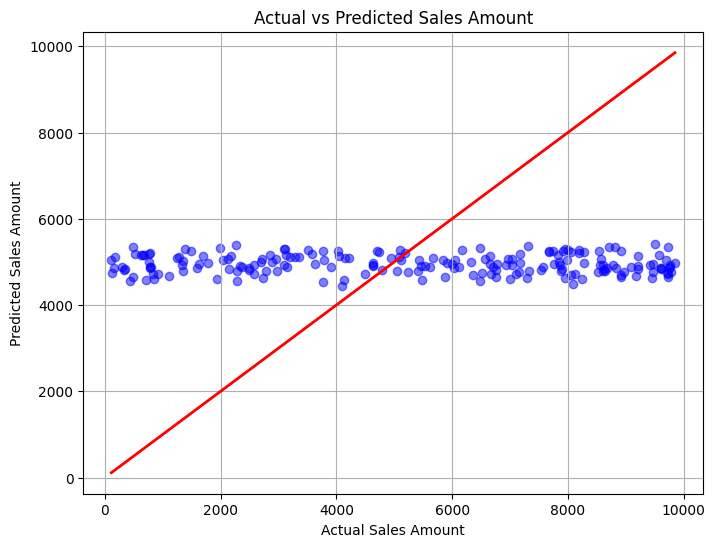

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # perfect prediction line
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.title("Actual vs Predicted Sales Amount")
plt.grid(True)
plt.show()

# Improve Model with Encoding & Scaling
One-hot encode categorical features

Scale numeric features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Step 1: Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Create transformers
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

# Step 3: Build pipeline with LinearRegression
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

# Step 4: Train the pipeline on the original X
pipeline.fit(X_train, y_train)

# Step 5: Predict
y_pred_enhanced = pipeline.predict(X_test)

# Step 6: Evaluate again
mae = mean_absolute_error(y_test, y_pred_enhanced)
mse = mean_squared_error(y_test, y_pred_enhanced)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_enhanced)

# Print updated metrics
print("🔧 Enhanced Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

🔧 Enhanced Model Performance:
MAE: 2738.39
MSE: 9485380.97
RMSE: 3079.83
R² Score: -0.03


# Save and Deploy Your Model

In [ ]:
import joblib

# Save the full pipeline (preprocessing + model)
joblib.dump(pipeline, 'sales_prediction_model.pkl')

print("✅ Model saved as 'sales_prediction_model.pkl'")


✅ Model saved as 'sales_prediction_model.pkl'


This creates a file called sales_prediction_model.pkl which you can:

Reload anytime

Use for prediction on new data

**To load and use the model later:**

In [ ]:
# Load the saved model
loaded_model = joblib.load('sales_prediction_model.pkl')

# Predict on new data
# new_data = pd.DataFrame({...})
# prediction = loaded_model.predict(new_data)